In [2]:
import pandas as pd
import numpy as np

import geopandas as gpd
data_dir = './rawdatas/'

In [3]:
grid = gpd.read_file(data_dir + 'gb_grid/gb_grid.shp', encoding='utf-8')
# grid.plot()

- **종합병원 위치**

In [4]:
hos = pd.read_csv(data_dir+'1.병원정보서비스.csv')

hos = hos[hos['시도코드명']=='경북']
hos = hos[hos['종별코드명']=='종합병원']
hos = hos[['요양기관명', '종별코드명', '시도코드명', '시군구코드명', '읍면동', '좌표(X)', '좌표(Y)']]

hos = hos.reset_index(drop=True)
hos.head()

,요양기관명,종별코드명,시도코드명,시군구코드명,읍면동,좌표(X),좌표(Y)
0,경상북도김천의료원,종합병원,경북,김천시,모암동,128.126439,36.122723
1,경상북도안동의료원,종합병원,경북,안동시,북문동,128.732112,36.568221
2,경상북도포항의료원,종합병원,경북,포항북구,용흥동,129.354941,36.034881
3,구미강동병원,종합병원,경북,구미시,진평동,128.422869,36.096239
4,동국대학교의과대학경주병원,종합병원,경북,경주시,석장동,129.196658,35.858308


In [5]:
hos_geo = gpd.GeoDataFrame(data=hos, geometry=gpd.points_from_xy(hos['좌표(X)'], hos['좌표(Y)']),
                 crs='epsg:4326')
hos_geo.head()

,요양기관명,종별코드명,시도코드명,시군구코드명,읍면동,좌표(X),좌표(Y),geometry
0,경상북도김천의료원,종합병원,경북,김천시,모암동,128.126439,36.122723,POINT (128.12644 36.12272)
1,경상북도안동의료원,종합병원,경북,안동시,북문동,128.732112,36.568221,POINT (128.73211 36.56822)
2,경상북도포항의료원,종합병원,경북,포항북구,용흥동,129.354941,36.034881,POINT (129.35494 36.03488)
3,구미강동병원,종합병원,경북,구미시,진평동,128.422869,36.096239,POINT (128.42287 36.09624)
4,동국대학교의과대학경주병원,종합병원,경북,경주시,석장동,129.196658,35.858308,POINT (129.19666 35.85831)


In [6]:
gb_sgg = gpd.read_file(data_dir+'LARD_ADM_SECT_SGG_경북/LARD_ADM_SECT_SGG_47_202403.shp', encoding='cp949')
gb_sgg = gb_sgg.to_crs('epsg:4326')

<Axes: >

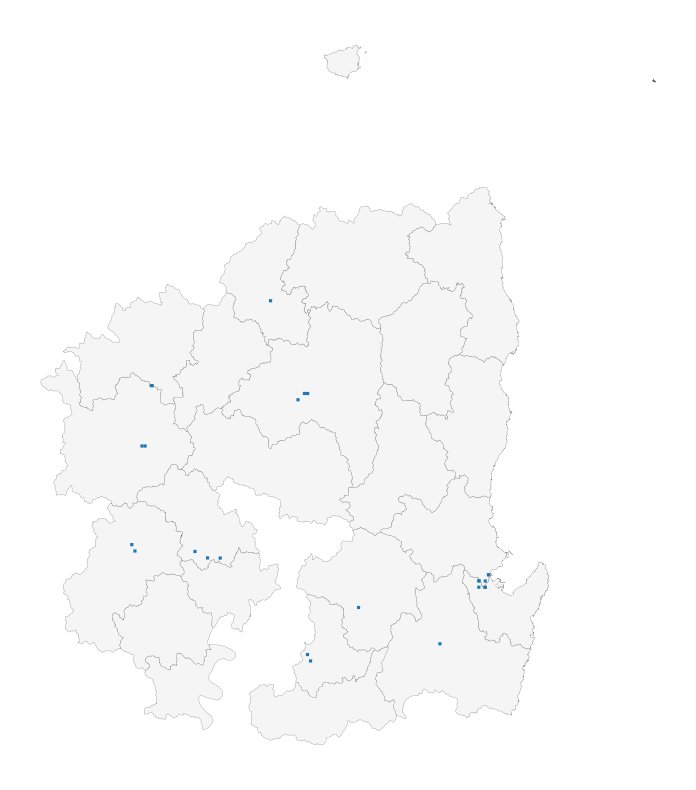

In [7]:
# ax = grid.plot(figsize=(20, 20), color='whitesmoke', linewidth=0.1, edgecolor='black')
ax = gb_sgg.plot(figsize=(10, 10), color='whitesmoke', edgecolor='black', linewidth=0.1)
ax.axis('off')
# hos_geo.plot(ax=ax, color='deepskyblue', markersize=10, marker=',') # 종합병원 포인트 표시 

gpd.sjoin(grid, hos_geo).plot(ax=ax)

- 클러스터링 결과 투영

In [8]:
sgg_cls = pd.read_csv('sgg_clusters.csv')
sgg_cls = sgg_cls.iloc[:, 1:]
sgg_cls.head()

,SGG_NM,Cluster
0,포항시 남구,1
1,포항시 북구,1
2,경주시,1
3,김천시,2
4,안동시,2


In [9]:
gb_sgg_with_cls = gb_sgg.copy()
gb_sgg_with_cls = pd.merge(gb_sgg_with_cls, sgg_cls, how='left', on='SGG_NM')
gb_sgg_with_cls.head()

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,geometry,Cluster
0,47111,포항시 남구,1,47110,"MULTIPOLYGON (((129.57924 36.05416, 129.57949 ...",1
1,47113,포항시 북구,2,47110,"MULTIPOLYGON (((129.28207 36.33205, 129.28261 ...",1
2,47130,경주시,2,47130,"POLYGON ((128.97136 35.75713, 128.97196 35.758...",1
3,47150,김천시,51,47150,"MULTIPOLYGON (((128.25930 36.20308, 128.25935 ...",2
4,47170,안동시,370,47170,"MULTIPOLYGON (((128.42916 36.52273, 128.43020 ...",2


<Axes: >

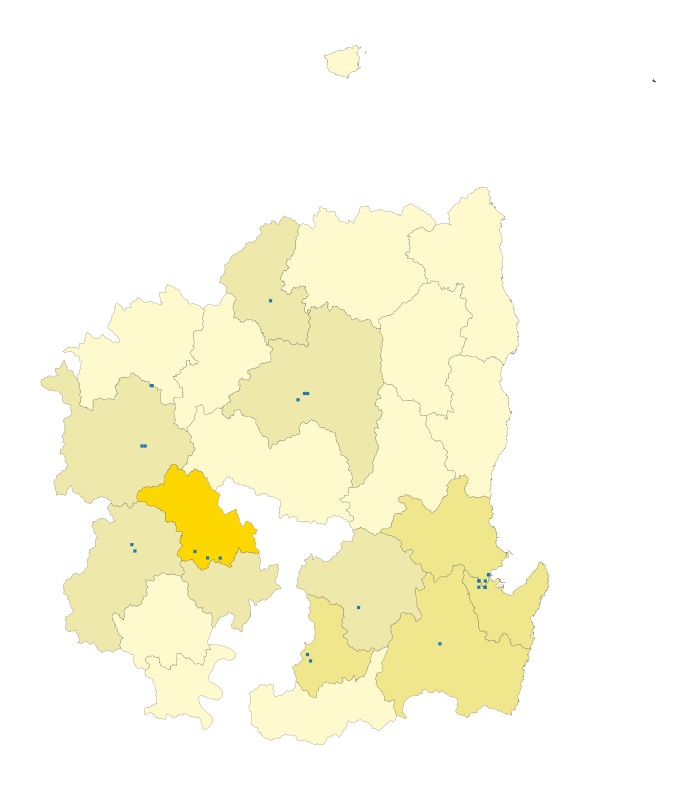

In [10]:
color_mapping = {0: 'lemonchiffon', 2: 'palegoldenrod', 1: 'khaki', 3: 'gold'}
ax = gb_sgg_with_cls.plot(figsize=(10, 10), edgecolor='black', linewidth=0.1,
                          color=gb_sgg_with_cls['Cluster'].map(color_mapping))
ax.axis(False)
gpd.sjoin(grid, hos_geo).plot(ax=ax)

-> 0 클러스터 권역에는 종합병원이 위치하지 않은 것을 확인할 수 있음.

- **도로교통망**

In [11]:
gb_link = gpd.read_file(data_dir+'gb_link/GB_LINK.shp')
gb_link = gb_link.to_crs('epsg:4326')

link_in_grid = gpd.sjoin(grid, gb_link) # ->도로가 있는 격자

<Axes: >

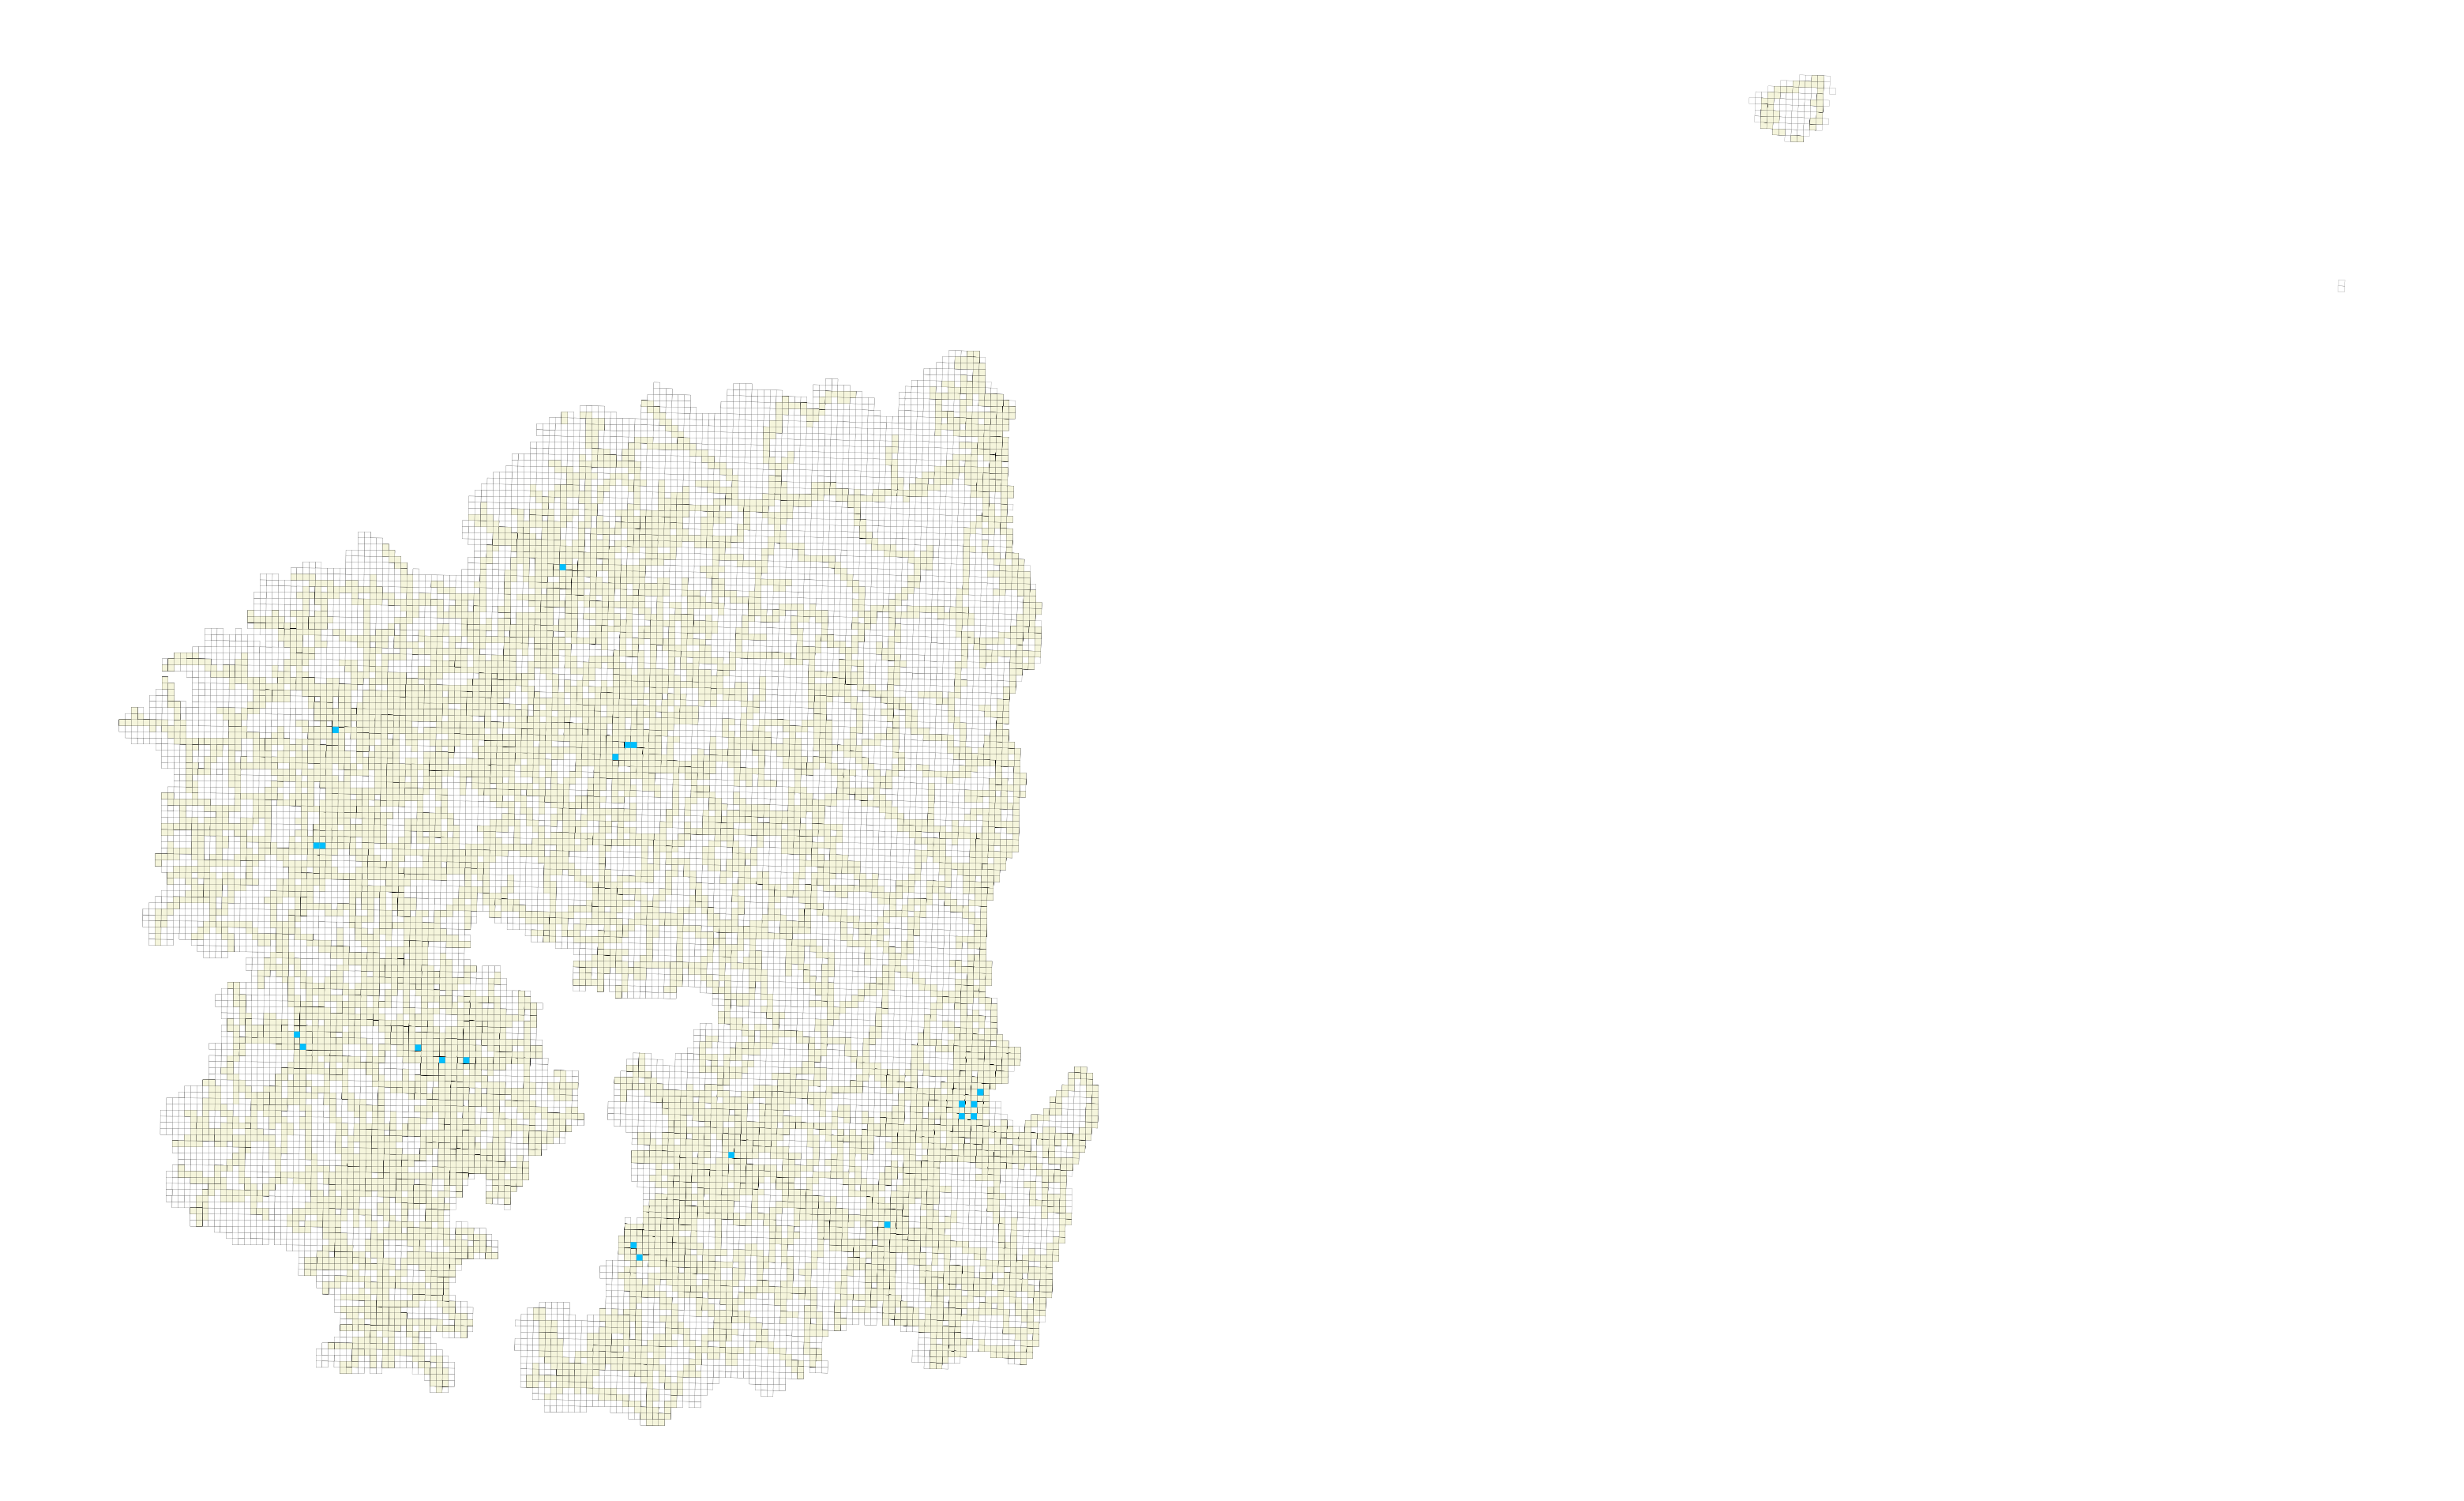

In [12]:
ax = grid.plot(figsize=(40, 40), color='white', linewidth=0.1, edgecolor='black')
ax.axis('off')

link_in_grid.plot(ax=ax, color='beige', linewidth=0.1, edgecolor='black')
gpd.sjoin(grid, hos_geo).plot(ax=ax, color='deepskyblue')

In [13]:
# hosgrid = gpd.sjoin(grid, hos_geo)
# hosgrid = hosgrid.loc[:, ['geometry', '요양기관명']]
# hosgrid = hosgrid.rename(columns={'요양기관명':'HOS_NM'})
# hosgrid.to_file('./grid_datas/hos_points.shp', encoding='utf-8')

# link_in_grid.to_file('./grid_datas/links.shp', encodinf='utf-8')

#  shp 파일로 저장할 때는 컬럼명이 전부 영어로 되어있어야 함
# bstop_gdf.to_file('gb_bustop.shp', encoding='utf-8')
# gpd.sjoin(grid, hos_geo).to_file('./grid_datas/hos_points.shp', encoding='utf-8')

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_2116\1177153693.py:6: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  link_in_grid.to_file('./grid_datas/links.shp', encodinf='utf-8')


- **버스정류장**

In [14]:
gb_bstop = gpd.read_file('gb_bustop.shp', encoding='utf-8')
gb_bstop.head()

,STOP_NO,STOP_NM,LONG,LAT,DATE,MOBILE,CITY_CODE,CITY_NAME,ADM_CITY,geometry
0,ADB354000076,신덕1리,36.524325,128.830926,2023-10-16,540076.0,37040,경상북도 안동시,안동,POINT (128.83093 36.52432)
1,ADB354000077,나천,36.484444,128.876390,2023-10-16,540077.0,37040,경상북도 안동시,안동,POINT (128.87639 36.48444)
2,ADB354000078,골삽실,36.462248,128.887606,2023-10-16,540078.0,37040,경상북도 안동시,안동,POINT (128.88761 36.46225)
3,ADB354000079,금곡(길안),36.394360,128.933281,2023-10-16,540079.0,37040,경상북도 안동시,안동,POINT (128.93328 36.39436)
4,ADB354000080,대사.토일,36.368580,128.940353,2023-10-16,540080.0,37040,경상북도 안동시,안동,POINT (128.94035 36.36858)


In [15]:
bstop_in_grid = gpd.sjoin(grid, gb_bstop)

<Axes: >

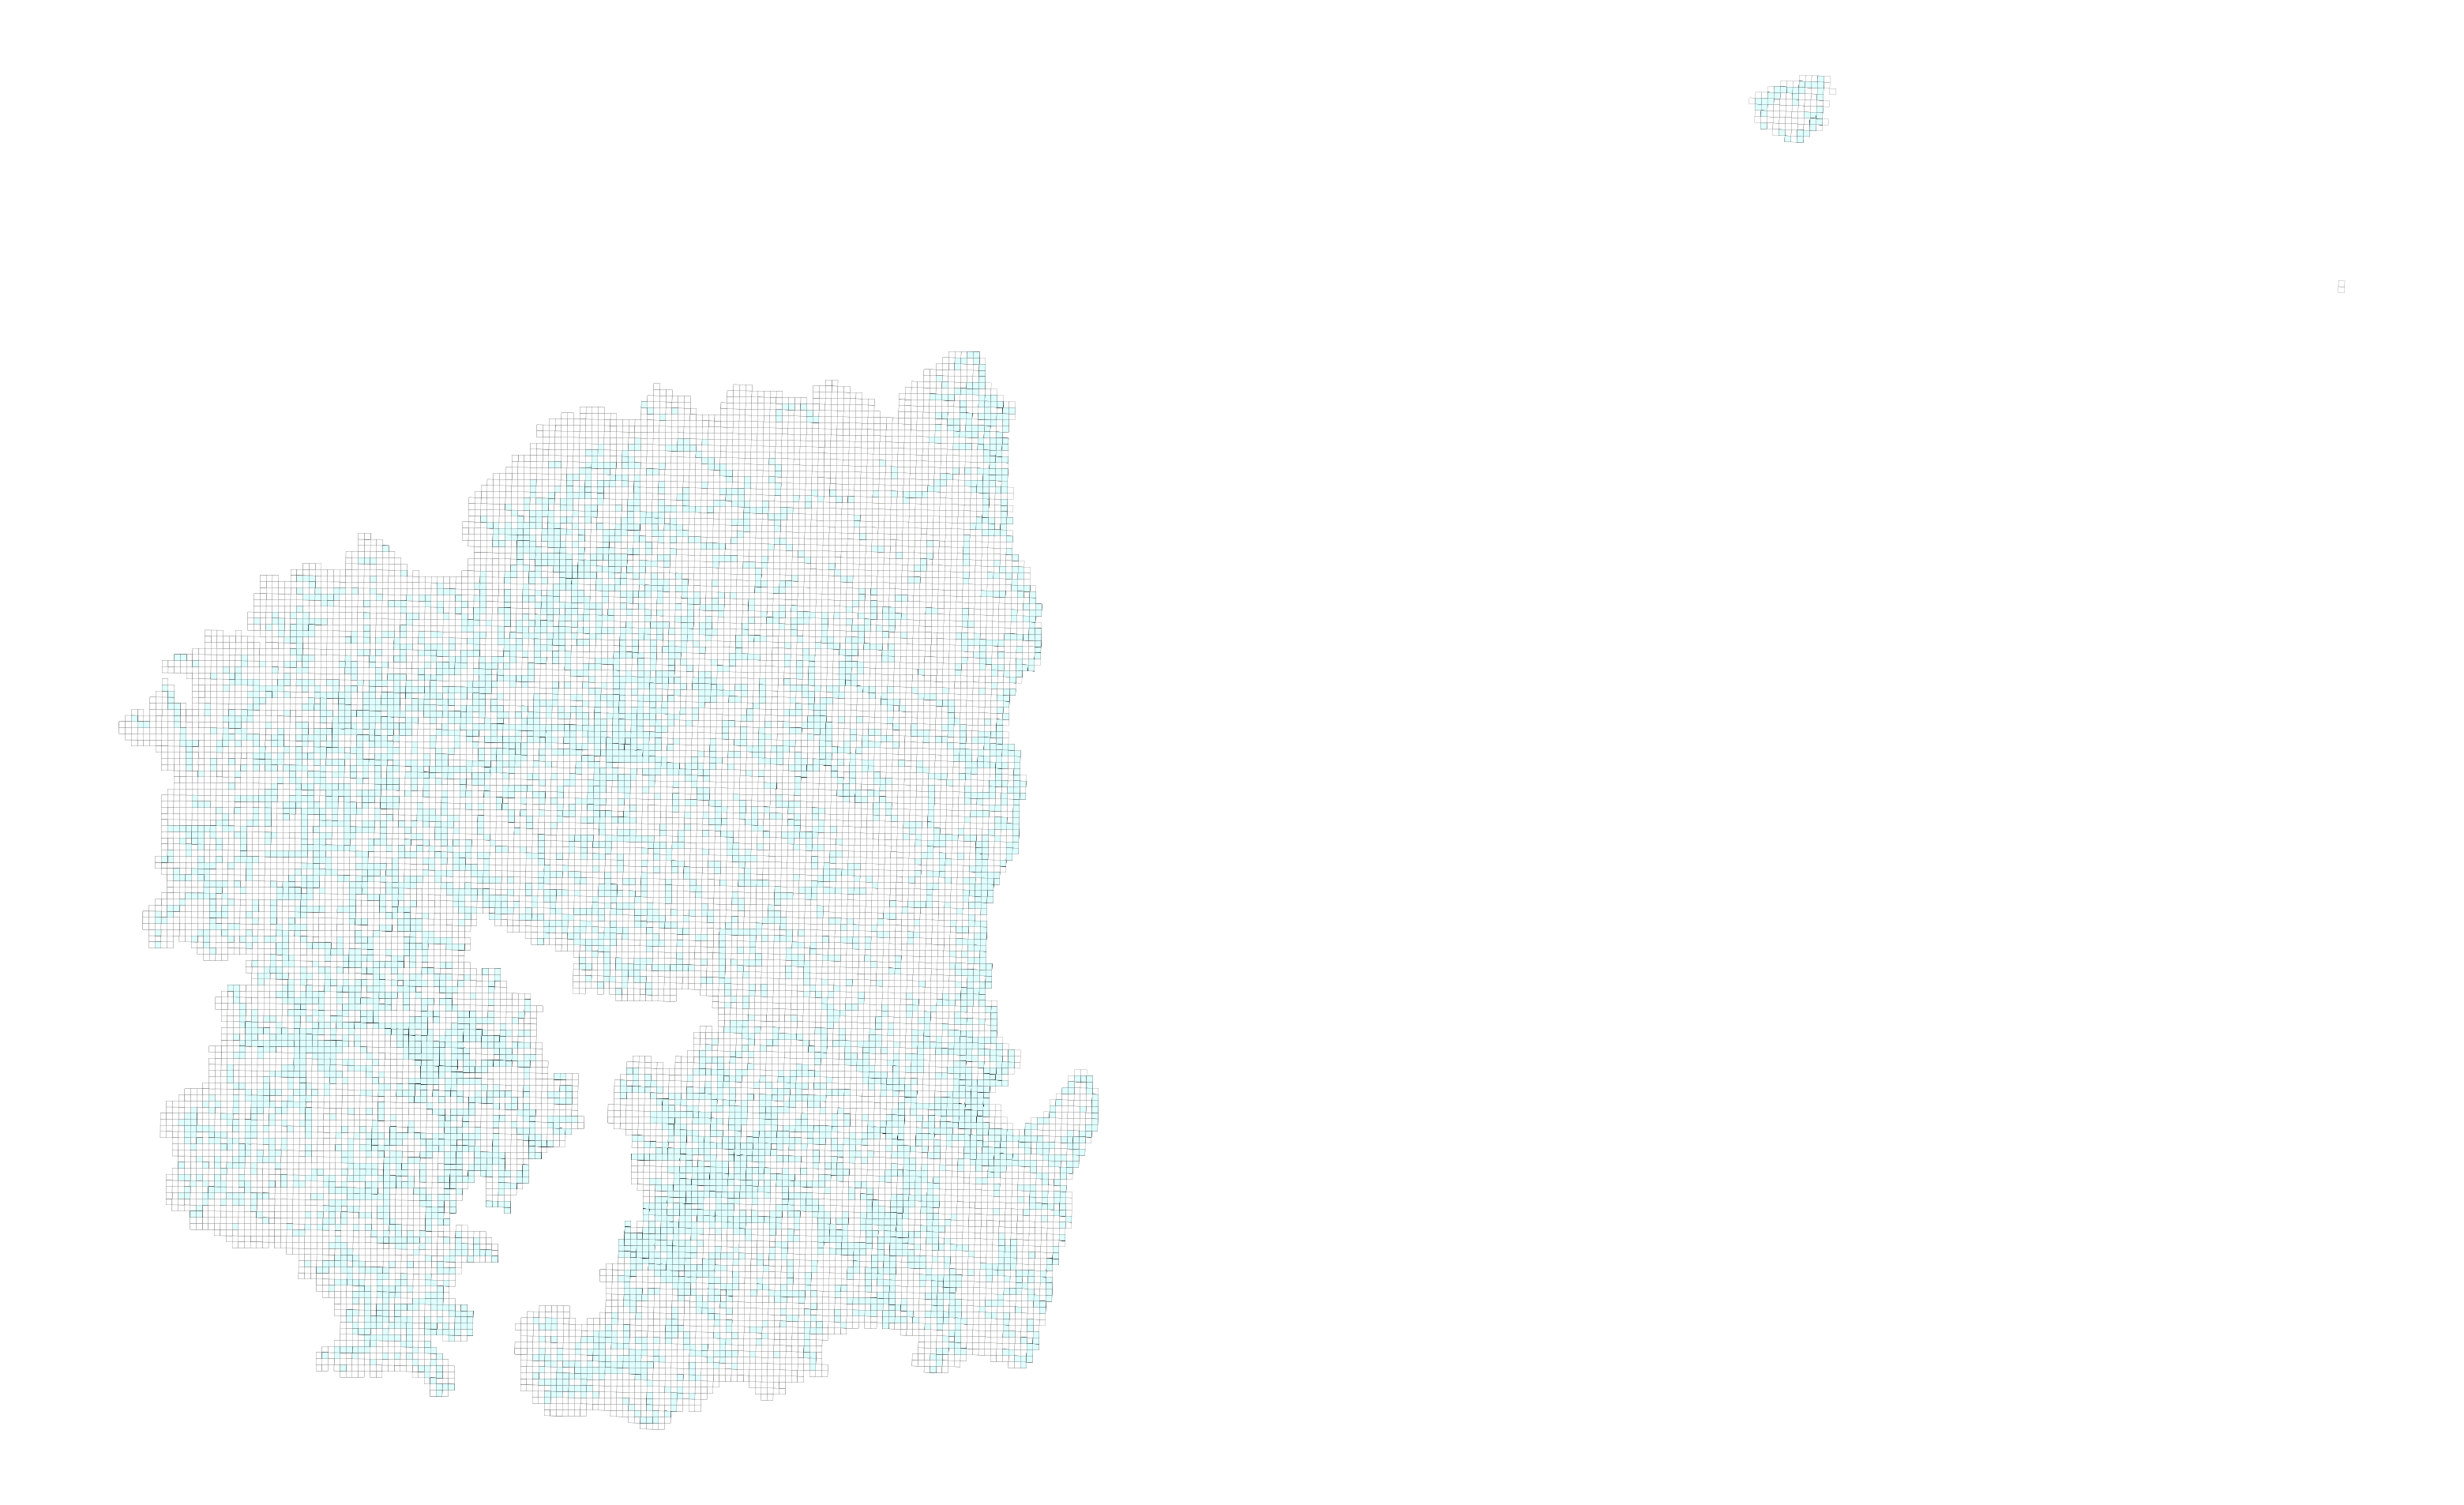

In [16]:
ax = grid.plot(figsize=(40, 40), color='white', linewidth=0.1, edgecolor='black')
ax.axis('off')

bstop_in_grid.plot(ax=ax, color='lightcyan', linewidth=0.1, edgecolor='black')


In [28]:
# bstop_in_grid.to_file('./grid_datas/bstops.shp', encodinf='utf-8')

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_2116\3975044494.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  bstop_in_grid.to_file('./grid_datas/bstops.shp', encodinf='utf-8')


- **0 클러스터 격자 추출**

In [17]:
grid_cluster_0 = gpd.sjoin(grid, gb_sgg_with_cls[gb_sgg_with_cls['Cluster']==0])

<Axes: >

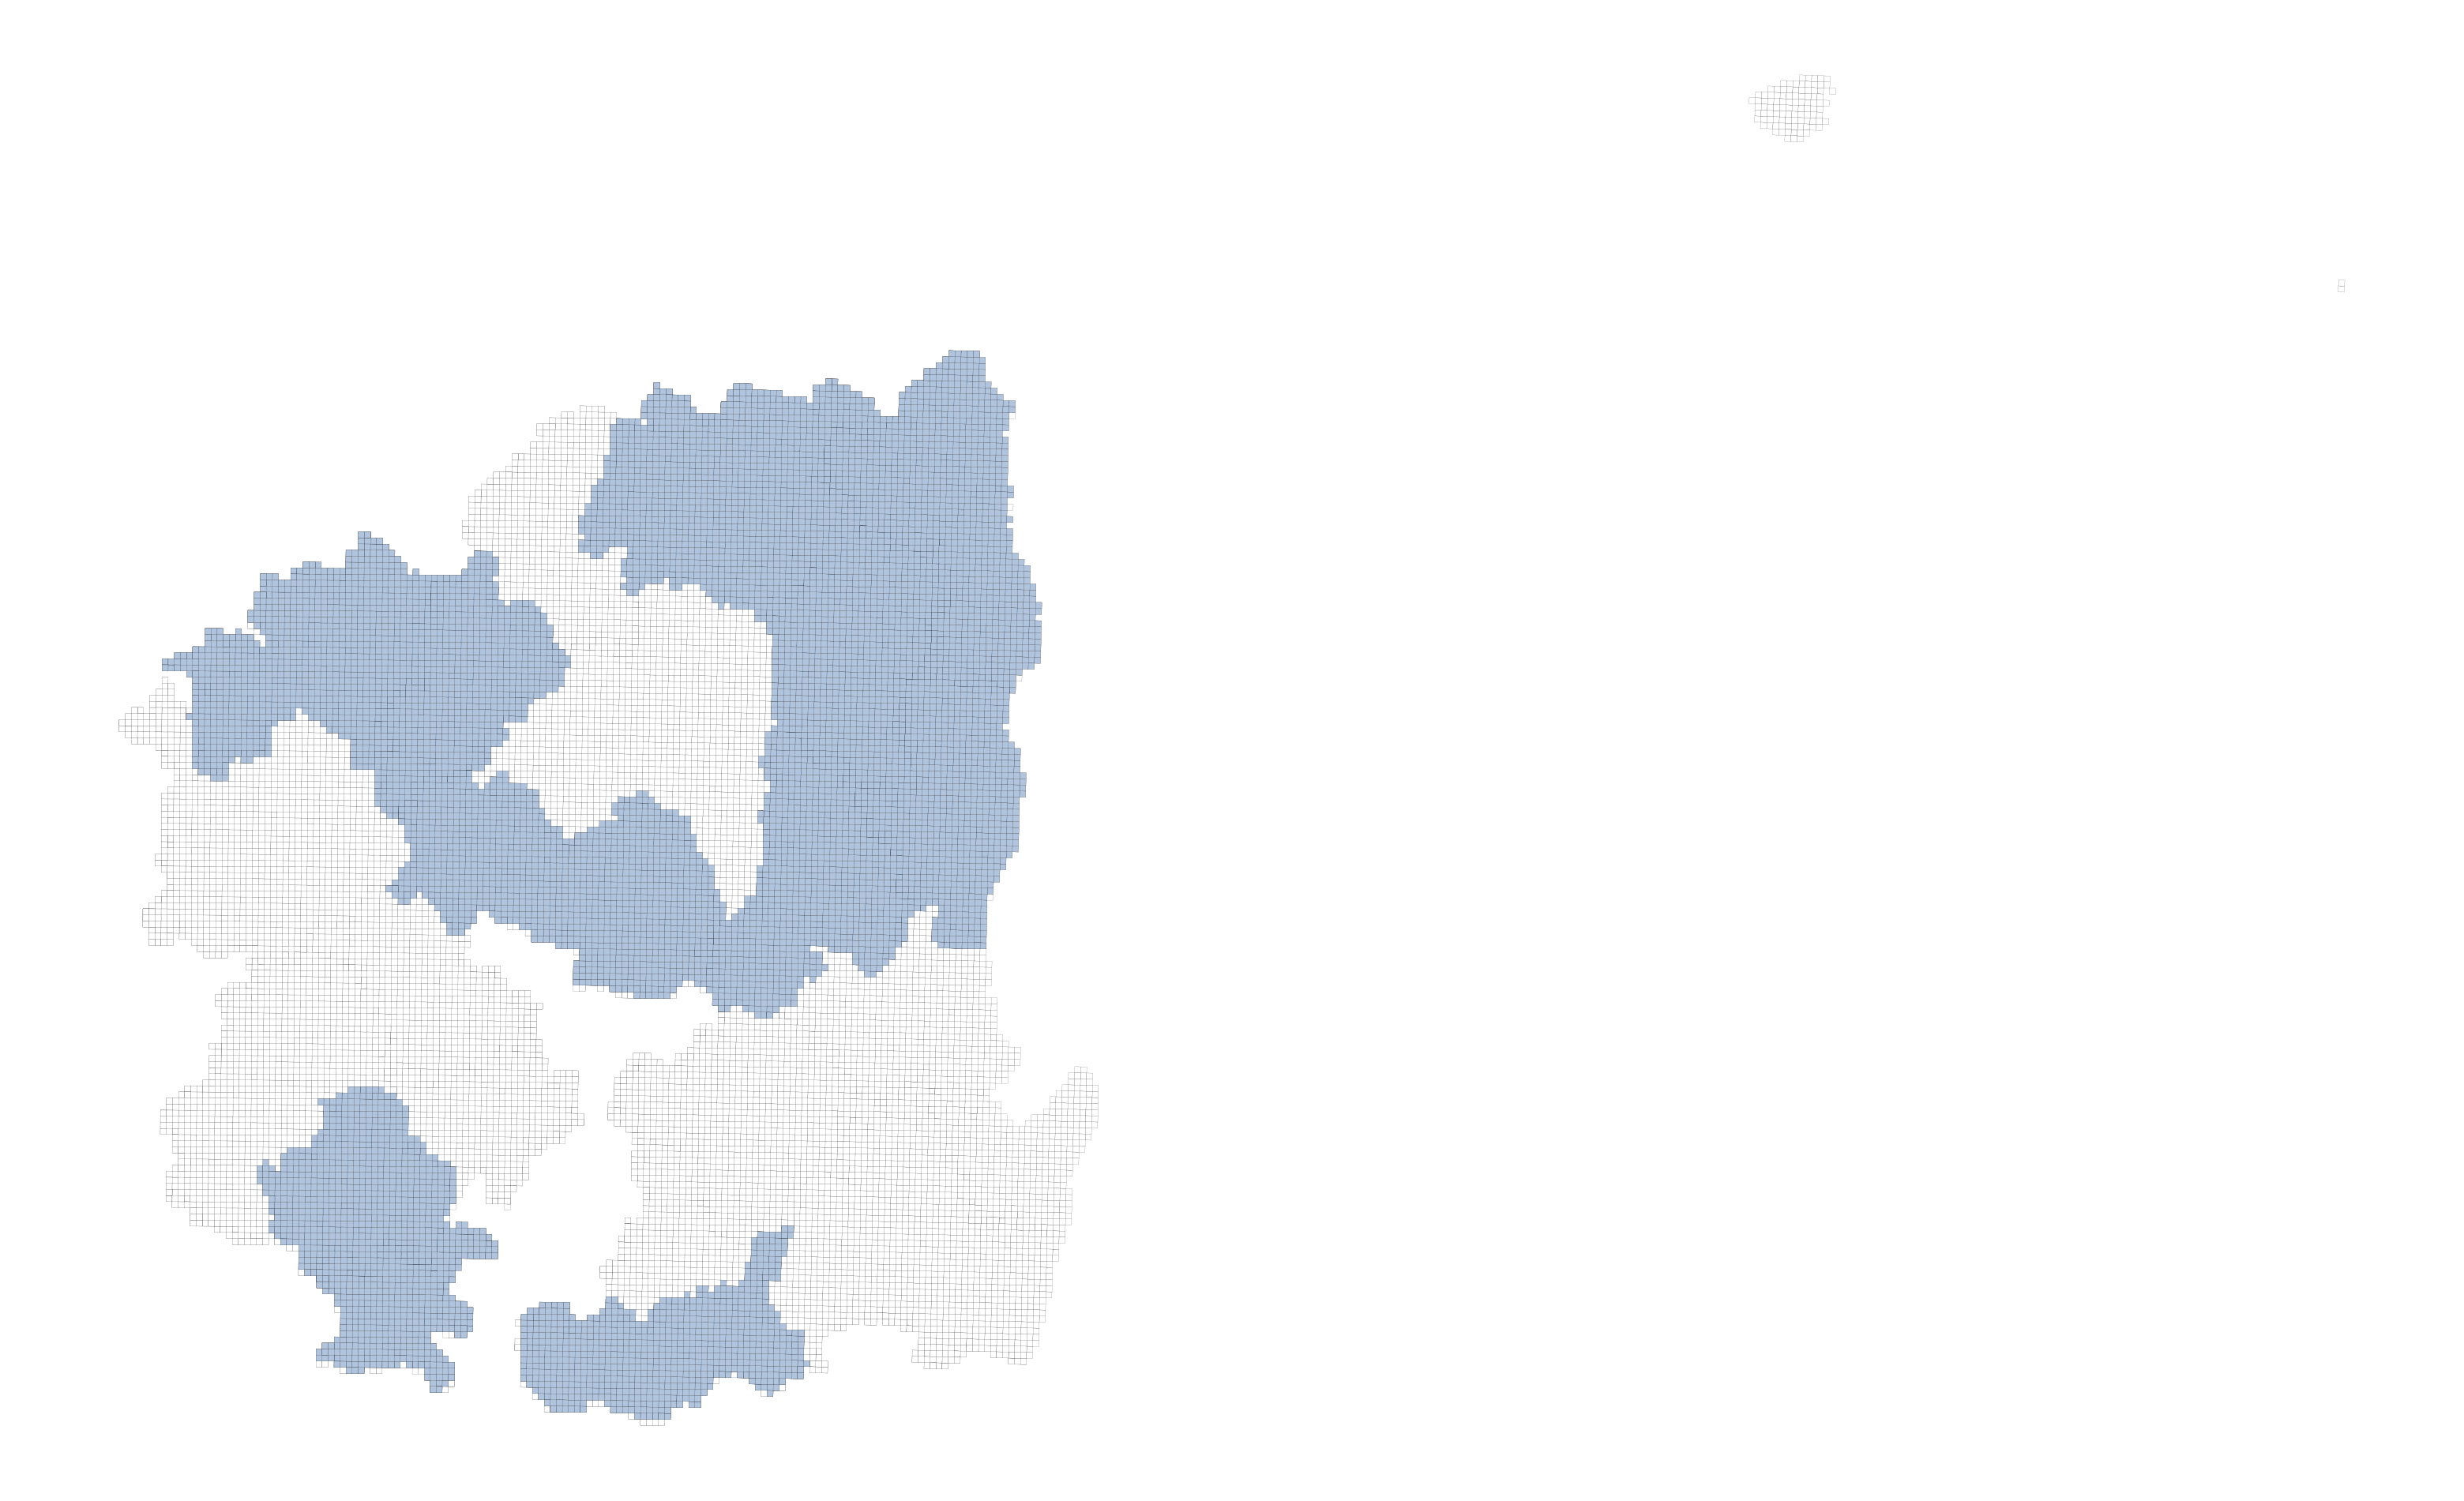

In [18]:
ax = grid.plot(figsize=(40, 40), color='white', linewidth=0.1, edgecolor='black')
ax.axis('off')

grid_cluster_0.plot(ax=ax, color='lightsteelblue', linewidth=0.1, edgecolor='black')

- **읍면동 인구 취합**

In [19]:
pops = pd.read_csv('gb_pops_3cat.csv')
pops = pops.iloc[:, 1:]
pops.head()

,cat1,cat2,cat3,total_pop,0-14,65-,15-64,temp
0,경상북도,포항시남구,구룡포읍,6796,173,3206,3417,포항시남구 구룡포읍
1,경상북도,포항시남구,연일읍,29119,3320,5172,20627,포항시남구 연일읍
2,경상북도,포항시남구,오천읍,57698,7990,8025,41683,포항시남구 오천읍
3,경상북도,포항시남구,대송면,3209,98,1356,1755,포항시남구 대송면
4,경상북도,포항시남구,동해면,9513,765,2822,5926,포항시남구 동해면


In [20]:
# 인구 구성별 가중치 적용한 집계인구
pops['adj_total'] = (pops['0-14']*1.25) + pops['15-64'] + (pops['65-']*1.5)
pops.head()

,cat1,cat2,cat3,total_pop,0-14,65-,15-64,temp,adj_total
0,경상북도,포항시남구,구룡포읍,6796,173,3206,3417,포항시남구 구룡포읍,8442.25
1,경상북도,포항시남구,연일읍,29119,3320,5172,20627,포항시남구 연일읍,32535.00
2,경상북도,포항시남구,오천읍,57698,7990,8025,41683,포항시남구 오천읍,63708.00
3,경상북도,포항시남구,대송면,3209,98,1356,1755,포항시남구 대송면,3911.50
4,경상북도,포항시남구,동해면,9513,765,2822,5926,포항시남구 동해면,11115.25


In [21]:
# 0 클러스터 지역만 선택
pops_0cls = pops[pops['cat2'].apply(lambda x: x in sgg_cls[sgg_cls['Cluster']==0]['SGG_NM'].values)]
pops_0cls.head()

,cat1,cat2,cat3,total_pop,0-14,65-,15-64,temp,adj_total
182,경상북도,문경시,문경읍,6761,366,2814,3581,문경시 문경읍,8259.50
183,경상북도,문경시,가은읍,3908,178,1865,1865,문경시 가은읍,4885.00
184,경상북도,문경시,영순면,2297,102,1100,1095,문경시 영순면,2872.50
185,경상북도,문경시,산양면,2997,142,1438,1417,문경시 산양면,3751.50
186,경상북도,문경시,호계면,2325,73,984,1268,문경시 호계면,2835.25


In [22]:
# 읍면동 위치정보에 adj_total을 추가
gb_umd = gpd.read_file(data_dir+'gb_geos.geojson')
gb_umd.head(1)

,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,temp,sggnm,adm_cd8,geometry
0,경상북도 포항시남구 구룡포읍,3701111,4711125000,47111,47,경상북도,포항시남구 구룡포읍,포항시남구,37011110,"MULTIPOLYGON (((129.53015 35.93495, 129.52901 ..."


In [23]:
gb_umd = pd.merge(gb_umd, pops_0cls[['temp', 'adj_total']], on='temp', how='inner')
gb_umd.head(1)

,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,temp,sggnm,adm_cd8,geometry,adj_total
0,경상북도 문경시 문경읍,3709011,4728025000,47280,47,경상북도,문경시 문경읍,문경시,37090110,"MULTIPOLYGON (((128.21699 36.81305, 128.21928 ...",8259.5


In [24]:
grid_cluster_0 = grid_cluster_0.drop(labels='index_right', axis=1)


In [25]:

# 0 클러스터 격자에 인구 정보 추가
gpd.sjoin(grid_cluster_0, gb_umd)

,SPO_NO_CD,SECT_CD,geometry,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,Cluster,index_right,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,temp,sggnm,adm_cd8,adj_total
31,라마8759,27290,"POLYGON ((128.46314 35.82363, 128.46325 35.832...",47830,고령군,369,47830,0,68,경상북도 고령군 다산면,3737034,4783034000,47830,47,경상북도,고령군 다산면,고령군,37570340,9327.50
44,라마8154,27710,"POLYGON ((128.39622 35.77907, 128.39632 35.788...",47830,고령군,369,47830,0,68,경상북도 고령군 다산면,3737034,4783034000,47830,47,경상북도,고령군 다산면,고령군,37570340,9327.50
48,라마8457,27710,"POLYGON ((128.42973 35.80586, 128.42983 35.814...",47830,고령군,369,47830,0,68,경상북도 고령군 다산면,3737034,4783034000,47830,47,경상북도,고령군 다산면,고령군,37570340,9327.50
51,라마8557,27710,"POLYGON ((128.44079 35.80578, 128.44090 35.814...",47830,고령군,369,47830,0,68,경상북도 고령군 다산면,3737034,4783034000,47830,47,경상북도,고령군 다산면,고령군,37570340,9327.50
52,라마8561,27710,"POLYGON ((128.44122 35.84184, 128.44132 35.850...",47830,고령군,369,47830,0,68,경상북도 고령군 다산면,3737034,4783034000,47830,47,경상북도,고령군 다산면,고령군,37570340,9327.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19757,마바1016,47730,"POLYGON ((128.72567 36.33511, 128.72581 36.344...",47730,의성군,1,47730,0,14,경상북도 의성군 의성읍,3732011,4773025000,47730,47,경상북도,의성군 의성읍,의성군,37520110,15019.75
19758,마바1018,47730,"POLYGON ((128.72595 36.35313, 128.72609 36.362...",47730,의성군,1,47730,0,14,경상북도 의성군 의성읍,3732011,4773025000,47730,47,경상북도,의성군 의성읍,의성군,37520110,15019.75
19759,마바1019,47730,"POLYGON ((128.72609 36.36215, 128.72624 36.371...",47730,의성군,1,47730,0,14,경상북도 의성군 의성읍,3732011,4773025000,47730,47,경상북도,의성군 의성읍,의성군,37520110,15019.75
19764,마바1114,47730,"POLYGON ((128.73653 36.31697, 128.73667 36.325...",47730,의성군,1,47730,0,14,경상북도 의성군 의성읍,3732011,4773025000,47730,47,경상북도,의성군 의성읍,의성군,37520110,15019.75


In [26]:
# hosgrid = gpd.sjoin(grid, hos_geo)
# hosgrid = hosgrid.loc[:, ['geometry', '요양기관명']]
# hosgrid = hosgrid.rename(columns={'요양기관명':'HOS_NM'})
# hosgrid.to_file('./grid_datas/hos_points.shp', encoding='utf-8')

#  shp 파일로 저장할 때는 컬럼명이 전부 영어로 되어있어야 함
# bstop_gdf.to_file('gb_bustop.shp', encoding='utf-8')
# gpd.sjoin(grid, hos_geo).to_file('./grid_datas/hos_points.shp', encoding='utf-8')

In [27]:
import os
os.listdir(data_dir)

['1.병원정보서비스.csv',
 '153.1 종합병원(읍면동) 서비스권역 외 취약인구비율(5.0km)_2022.msld',
 '3.의료기관별상세정보서비스_01_시설정보.csv',
 'gb_geos.geojson',
 'gb_grid',
 'gb_link',
 'HangJeongDong_ver20230701.geojson',
 'integrated_for_clst_(1).csv',
 'LARD_ADM_SECT_SGG_경북',
 'nlsp_020001010.msld',
 'sig_20230729',
 '건강보험심사평가원_병원급이상 진료과목별 시도별 진료비 통계_20221231.csv',
 '건강보험심사평가원_의료기관 시군구별 진료비 통계_20221231.csv',
 '건강보험심사평가원_전문병원 지정 현황_20210101.csv',
 '보건복지부_공공보건 의료기관 현황_20161231.csv',
 '빈격자1km',
 '시·군·구별_연간_미충족의료율_병의원__20240411154120_1레벨.csv',
 '시도별_공공의료기관_비중_20240411163247.csv',
 '인구, 가구 및 주택 – 읍면동(연도 끝자리 0, 5), 시군구(그 외 연도).csv',
 '인구_1000명당_의사수.csv',
 '전국 병의원 및 약국 현황 2023.12',
 '지역별종별_의료인력현황_의사등_2022년4분기.csv',
 '행정구역_읍면동_별_5세별_주민등록인구_2011년__20240414151259.csv',
 '행정안전부_병원_20240302.csv']